[6.66658281e+01 9.73251631e-03]
[0.0019024  0.01355932]


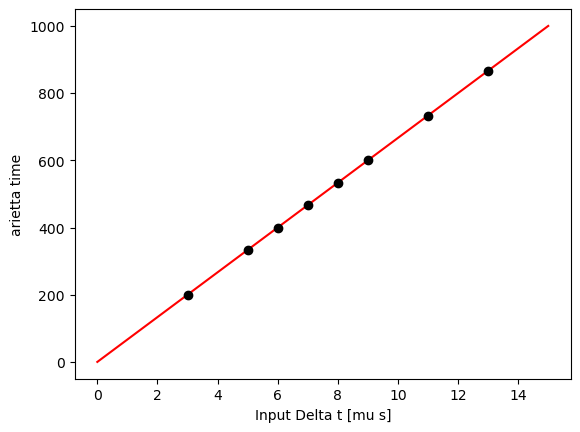

In [2]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

def linear_model(x,a,b):
    return a*x+b

Time=[5,6,7,8,11,13,3,9] #time in microseconds between the 2 signals send from picoscope
Counts = [300,300,300,300,300,300,300,300] 
Mean=[333.33,400.02,466.67,533.34,733.32,866.67,200.00,599.997] #arietta time
MeanSTD=[0.03,0.01,0.03,0.03,0.03,0.03,0.01,0.009]

x=np.array(Time)
y=np.array(Mean)
sy=np.array(MeanSTD)


par, cov= curve_fit(linear_model, x,y, sigma=sy, absolute_sigma=True)

print(par)
#print(cov)

per = np.sqrt(np.diag(cov))

print(per)

pendenza = par[0]
intercetta = par[1]

xx=np.linspace(0,15,1000)
plt.errorbar(x,y,yerr=sy, label="points", color='black', fmt='o')
plt.plot(xx,linear_model(xx,par[0],par[1]), color='red', label='fit')
plt.xlabel('Input Delta t [mu s]')
plt.ylabel('arietta time')

#plt.savefig("arietta-calibration.pdf")
plt.show()


Calibrazione 2024


66.66582814807072
0.009732516307442424


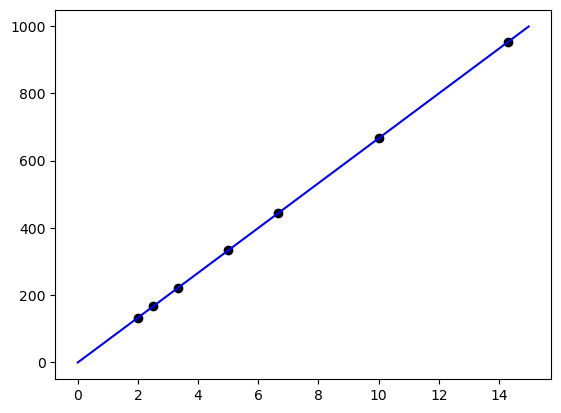

In [11]:
Time=[14.29,	
10.00,	
5.00,	
3.33,	
2.50,	
2.00,	
6.67]

Time=np.array(Time)

Arietta_time=[952.38,
666.70,
333.34,
222.24,
166.70,
133.33,
444.44]

Arietta_time = np.array(Arietta_time)

Arietta_time_error=[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
Arietta_time_error=np.array(Arietta_time_error)

par_25, _= curve_fit(linear_model, Time,Arietta_time, sigma=Arietta_time_error, absolute_sigma=True)

pendenza_25 = par[0]
intercetta_25 = par[1]

print(pendenza_25)
print(intercetta_25)

x_points=np.arange(0,15,0.015)
y_points=np.zeros(1000)

for i in range(len(x_points)):
    y_points[i]=linear_model(x_points[i], pendenza_25, intercetta_25)

plt.scatter(Time, Arietta_time, color='black', label='2025 points')
plt.plot(x_points, y_points, color='blue', label= 'calibrazione')


Calibrazione 2025, è rimasta la stessa dell'anno scorso anche dopo le modifiche all'arietta

2920


/tmp/ipykernel_2770/2173876859.py:54: RuntimeWarning: overflow encountered in exp
  return amp*np.exp(-1*gamma*x)+fondo
/tmp/ipykernel_2770/2173876859.py:54: RuntimeWarning: overflow encountered in multiply
  return amp*np.exp(-1*gamma*x)+fondo


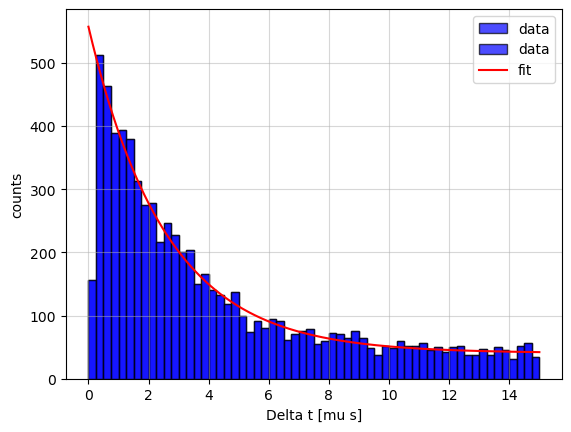

[3.89242400e-01 5.16442085e+02 4.05831394e+01]
[ 0.01464288 10.48929461  3.30374605]
muon lifetime is  2.569093195041818  pm 0.09664654576994337  microsecondi


In [ ]:



import glob
import matplotlib.pyplot as plt

import numpy as np

cartella = "../Data/Fondo"

file_dat = glob.glob(f"{cartella}/*.dat") #questo restituisce una stringa con i path dei file che si vogliono unire

output_file = "output.txt"

data = []

with open(output_file,"w") as output:

    for file in file_dat:
        with open(file,"r") as file:
            for line in file:
                data.append(float(line))
                output.write(line)

array = np.array(data)

array_time=[]
array_time_cut=[]

for i in data:
    array_time.append((i-intercetta_25)/pendenza_25)
    if i > 8:
        array_time_cut.append((i-intercetta)/pendenza_25)

np_array_time = np.array(array_time)
np_array_time_cut= np.array(array_time_cut)

j=0
for i in np_array_time_cut:
    if i <1.1:
        j=j+1 

print(j)


#plt.hist(array, bins=98, range=(20,1000), color="blue", edgecolor="black", alpha=0.7)

Nbins=60

hist,bins= np.histogram(np_array_time_cut, bins=Nbins)
bin_centers = (bins[:-1] + bins[1:]) / 2 
#bins[:-1] crea un array con tutti gli elementi di bins meno l'ultimo
#bins[1:] crea un array con tutti gli elementi di bins meno il primo
#->sommando i due array (la somma è element wise) ottengo la somma del limite destro e sinitro di ogni bin

def exponential(x, gamma, amp, fondo):
    return amp*np.exp(-1*gamma*x)+fondo
plt.hist(np_array_time_cut, bins=Nbins, range=(0,15), color="blue", edgecolor="black", alpha=0.7, label='data')

initial_guess = [2.1, 100, 10]

par_exp, cov_exp = curve_fit(exponential, bin_centers, hist,p0=initial_guess, maxfev = 2000)

per_exp= np.sqrt(np.diag(cov_exp))

fondo=par_exp[2]
amp=par_exp[1]
gamma=par_exp[0]
gamma_err=per_exp[0]

x_range=np.linspace(0,15,1000)

plt.hist(np_array_time_cut, bins=Nbins, range=(0,15), color="blue", edgecolor="black", alpha=0.7, label='data')
plt.grid(alpha=0.5)
plt.xlabel('Delta t [mu s]')
plt.ylabel('counts')
#plt.yscale('log')

plt.plot(x_range,exponential(x_range, gamma, amp, fondo), color='red', label='fit')
plt.legend()
plt.show()

print(par_exp)
print(per_exp)
print('muon lifetime is ',1./gamma, ' pm' , gamma_err/(gamma**2) , ' microsecondi')


In [1]:
"""
import ROOT
%jsroot on
from ROOT import gROOT
ROOT.gROOT.LoadMacro("RooFit_prova.C") 
canvas=ROOT.TCanvas("ciao","ciao")
canvas.cd()

ROOT.RooFit_prova()


canvas.Draw()
"""

'\nimport ROOT\n%jsroot on\nfrom ROOT import gROOT\nROOT.gROOT.LoadMacro("RooFit_prova.C") \ncanvas=ROOT.TCanvas("ciao","ciao")\ncanvas.cd()\n\nROOT.RooFit_prova()\n\n\ncanvas.Draw()\n'

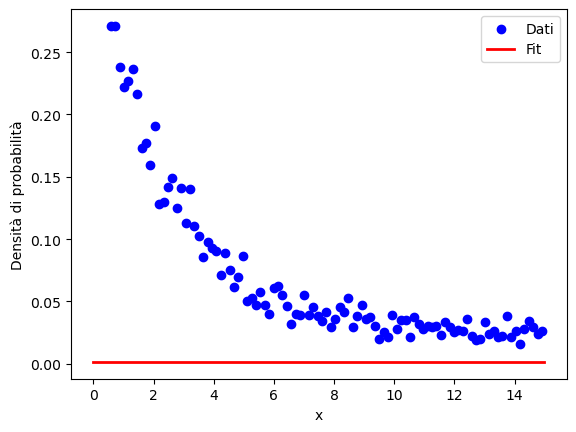

In [42]:
from iminuit import Minuit

indeces=[i for i in range(len(np_array_time_cut)) if np_array_time_cut[i]>=0.5]
dat=np_array_time_cut[indeces]


# Define the sum of two exponential PDFs
def exp_mixture_pdf(x, lambda1, lambda2, f):
    return f * lambda1 * np.exp(-lambda1 * x) + (1 - f) * lambda2 * np.exp(-lambda2 * x)

def neg_log_likelihood(lambda1, lambda2, f):
    
    if lambda1 <= 0 or lambda2 <= 0 or not (0 <= f <= 1):  # Avoid invalid values
        return np.inf  
    
    pdf_values = exp_mixture_pdf(dat, lambda1, lambda2, f)
    return -np.sum(np.log(pdf_values + 1e-9))  # Avoid log(0) issues

m = Minuit(neg_log_likelihood, lambda1=1/2.2, lambda2=1.7e-6, f=0.5)
m.limits = [(1./3, 1.), (None, None), (0, 1)]  # Parameter limits

#exponential plus linear background
def poly(x, lambda1, bl , f):
    return f * lambda1 * np.exp(-lambda1 * x) + (1 - f) * bl

def neg_log_likelihood_poly(lambda1, bl, f):
    
    if lambda1 <= 0 or not (0 <= f <= 1):  # Avoid invalid values
        return np.inf  
    
    pdf_values = exp_mixture_pdf(dat, lambda1, bl , f)
    return -np.sum(np.log(pdf_values + 1e-9))  # Avoid log(0) issues

m = Minuit(neg_log_likelihood_poly, lambda1=1/2.2, bl=0.2, f=0.5)
m.limits = [(1./3, 1.), (None, None), (0, 1)]  # Parameter limits

# Perform the minimization
m.migrad()

# Extract results
#print(m.values)  # Best-fit parameters
#print(m.errors)  # Uncertainties

"""
lambda1_fit, lambda2_fit, frac_fit = m.values
print(f"Fitted parameters: λ1 = {lambda1_fit:.3f}, λ2 = {lambda2_fit:.3f}, f = {frac_fit:.3f}")
print("tau= " , 1./lambda1_fit)
"""
"""
lambda1_fit, bl, frac_fit = m.values
print(f"Fitted parameters: λ1 = {lambda1_fit:.3f}, bl = {bl:.3f}, f = {frac_fit:.3f}")
print("tau= " , 1./lambda1_fit)
"""

# Crea un istogramma con i punti
bins = np.linspace(np.min(dat), np.max(dat), 100)  # Definisce i bin
hist_values, bin_edges = np.histogram(dat, bins=bins, density=True)  # Ottiene le frequenze

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calcola il centro dei bin

# Genera la funzione di fit
x_values = np.linspace(0, np.max(dat), 1000)  
y_fit = exp_mixture_pdf(x_values, lambda1_fit, lambda2_fit, frac_fit)  


# Plotta i punti invece dell'istogramma
plt.scatter(bin_centers, hist_values, color="b", label="Dati", marker="o")

# Plotta la funzione fittata
plt.plot(x_values, y_fit, "r-", label="Fit", linewidth=2)

plt.xlabel("x")
plt.ylabel("Densità di probabilità")
plt.legend()
plt.show()


pdf($\Delta t$)=$\frac{1}{\tau} e^{\frac{-\Delta t }{\tau}}+ \lambda e^{-\lambda \Delta t}$

